In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from ast import literal_eval

In [2]:
base_path = "../data"
train_path = os.path.join(base_path, "train.csv")
test_path = os.path.join(base_path, "sample_submission.csv")

In [3]:
df_train = pd.read_csv(train_path, converters={"bbox": literal_eval})
df_train.head(10)

image_id  width  height                          bbox   source
0  b6ab77fd7   1024    1024    [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024   [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024   [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024   [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024   [26.0, 144.0, 124.0, 117.0]  usask_1
5  b6ab77fd7   1024    1024  [569.0, 382.0, 119.0, 111.0]  usask_1
6  b6ab77fd7   1024    1024     [52.0, 602.0, 82.0, 45.0]  usask_1
7  b6ab77fd7   1024    1024   [627.0, 302.0, 122.0, 75.0]  usask_1
8  b6ab77fd7   1024    1024    [412.0, 367.0, 68.0, 82.0]  usask_1
9  b6ab77fd7   1024    1024   [953.0, 220.0, 56.0, 103.0]  usask_1

In [4]:
df_train.dtypes

image_id    object
width        int64
height       int64
bbox        object
source      object
dtype: object

In [5]:
df_test = pd.read_csv(test_path)
df_test.head()

image_id PredictionString
0  aac893a91    1.0 0 0 50 50
1  51f1be19e    1.0 0 0 50 50
2  f5a1f0358    1.0 0 0 50 50
3  796707dd7    1.0 0 0 50 50
4  51b3e36ab    1.0 0 0 50 50

In [6]:
df_train.shape

(147793, 5)

In [7]:
df_test.shape

(10, 2)

In [8]:
df_train.describe()

width    height
count  147793.0  147793.0
mean     1024.0    1024.0
std         0.0       0.0
min      1024.0    1024.0
25%      1024.0    1024.0
50%      1024.0    1024.0
75%      1024.0    1024.0
max      1024.0    1024.0

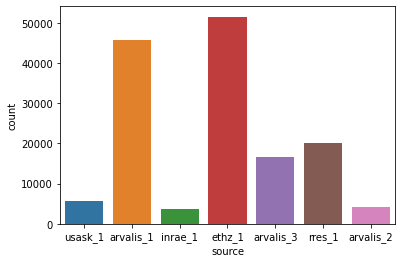

In [9]:
sns.countplot(x='source', data=df_train)
plt.show()

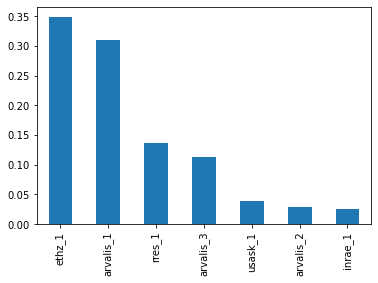

In [10]:
df_train['source'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [11]:
sample = df_train.sample(25)

In [12]:
images = [os.path.join(base_path, "train", f"{x}.jpg") for x in sample['image_id'].values]
images[0]

'../data/train/c446944d6.jpg'

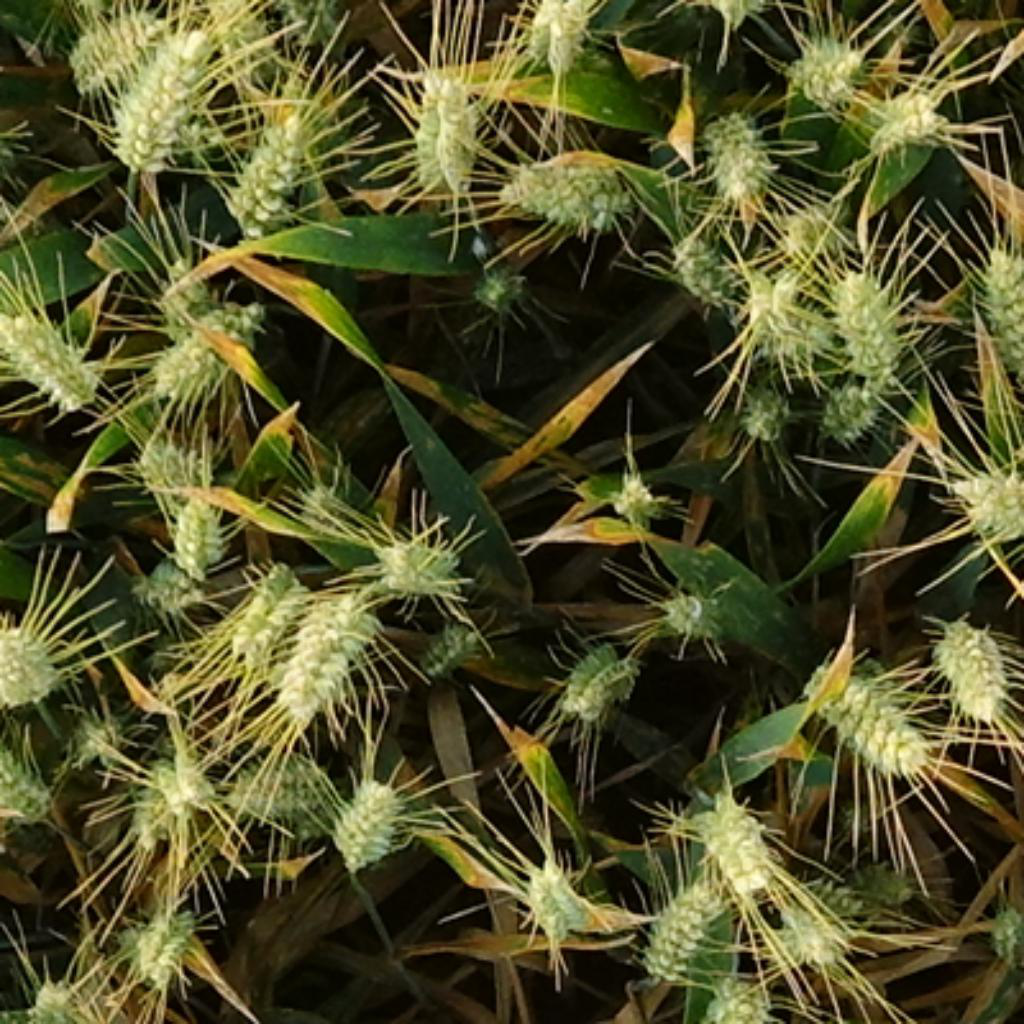

In [13]:
Image.open(images[12])

In [14]:
df_train.head()

image_id  width  height                         bbox   source
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  usask_1

In [15]:
df_train.iloc[0]['bbox']

[834.0, 222.0, 56.0, 36.0]

In [16]:
df_train['image_id'].unique()

array(['b6ab77fd7', 'b53afdf5c', '7b72ea0fb', ..., 'a5c8d5f5c',
       'e6b5e296d', '5e0747034'], dtype=object)

In [17]:
df_train[df_train['image_id'] == "5e0747034"]['bbox'].values

array([list([273.0, 284.0, 113.0, 92.0]),
       list([494.0, 125.0, 105.0, 92.0]),
       list([412.0, 220.0, 115.0, 97.0]),
       list([332.0, 404.0, 131.0, 87.0]),
       list([289.0, 742.0, 87.0, 72.0]), list([775.0, 586.0, 72.0, 56.0]),
       list([389.0, 927.0, 180.0, 97.0]),
       list([673.0, 337.0, 79.0, 95.0]),
       list([911.0, 243.0, 110.0, 79.0]),
       list([668.0, 81.0, 110.0, 70.0]), list([716.0, 7.0, 80.0, 64.0]),
       list([217.0, 865.0, 115.0, 102.0]),
       list([916.0, 46.0, 64.0, 56.0]), list([852.0, 640.0, 82.0, 94.0]),
       list([64.0, 619.0, 84.0, 95.0]), list([292.0, 549.0, 107.0, 82.0]),
       list([134.0, 228.0, 141.0, 71.0]),
       list([430.0, 13.0, 184.0, 79.0]), list([875.0, 740.0, 94.0, 61.0])],
      dtype=object)

In [18]:
df_train['bbox'] = df_train['bbox'].apply(lambda x : np.array(x))

In [19]:
df_comb = {}
for image_id in df_train['image_id'].unique():
    df_comb[image_id] = [df_train[df_train['image_id'] == image_id]['bbox'].values]
    
df_comb = pd.DataFrame.from_dict(df_comb, orient='index').reset_index()
df_comb.columns = ["image_id", "bboxes"]
df_comb.head()

image_id                                             bboxes
0  b6ab77fd7  [[834.0, 222.0, 56.0, 36.0], [226.0, 548.0, 13...
1  b53afdf5c  [[988.0, 781.0, 36.0, 96.0], [331.0, 863.0, 70...
2  7b72ea0fb  [[332.0, 662.0, 113.0, 50.0], [285.0, 755.0, 3...
3  91c9d9c38  [[124.0, 273.0, 59.0, 73.0], [688.0, 939.0, 61...
4  41c0123cc  [[0.0, 669.0, 73.0, 111.0], [572.0, 757.0, 110...

In [20]:
##Train set images
df_comb.shape

(3373, 2)

In [21]:
df_comb['image_path'] = df_comb['image_id'].apply(lambda x: os.path.join(base_path, "train", f"{x}.jpg"))
df_comb.head()

image_id                                             bboxes  \
0  b6ab77fd7  [[834.0, 222.0, 56.0, 36.0], [226.0, 548.0, 13...   
1  b53afdf5c  [[988.0, 781.0, 36.0, 96.0], [331.0, 863.0, 70...   
2  7b72ea0fb  [[332.0, 662.0, 113.0, 50.0], [285.0, 755.0, 3...   
3  91c9d9c38  [[124.0, 273.0, 59.0, 73.0], [688.0, 939.0, 61...   
4  41c0123cc  [[0.0, 669.0, 73.0, 111.0], [572.0, 757.0, 110...   

                    image_path  
0  ../data/train/b6ab77fd7.jpg  
1  ../data/train/b53afdf5c.jpg  
2  ../data/train/7b72ea0fb.jpg  
3  ../data/train/91c9d9c38.jpg  
4  ../data/train/41c0123cc.jpg

In [22]:
def display_samples(df, n_img=3):
    """Displays n_img X n_img images in a grid"""
    sample_size = n_img ** 2
    total_imgs, _ = df.shape
    sample = df.sample(sample_size)
    
    if n_img > 1:
        fig, axs = plt.subplots(n_img, n_img, figsize=(16, 16))
        for i, ax in enumerate(axs.ravel()):
            _, bboxes, image_path  = df.iloc[i].values
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            for bbox in bboxes:
                bbox = [int(x) for x in bbox]
                img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1]+bbox[3]), (255, 0, 0), 2)

            ax.imshow(img)

        plt.show()
        
    else:
        _, bboxes, image_path  = df.iloc[0].values
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for bbox in bboxes:
            bbox = [int(x) for x in bbox]
            img = cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1]+bbox[3]), (255, 0, 0), 2)

        fig = plt.figure(figsize=(12, 12))
        plt.imshow(img)
        plt.show()

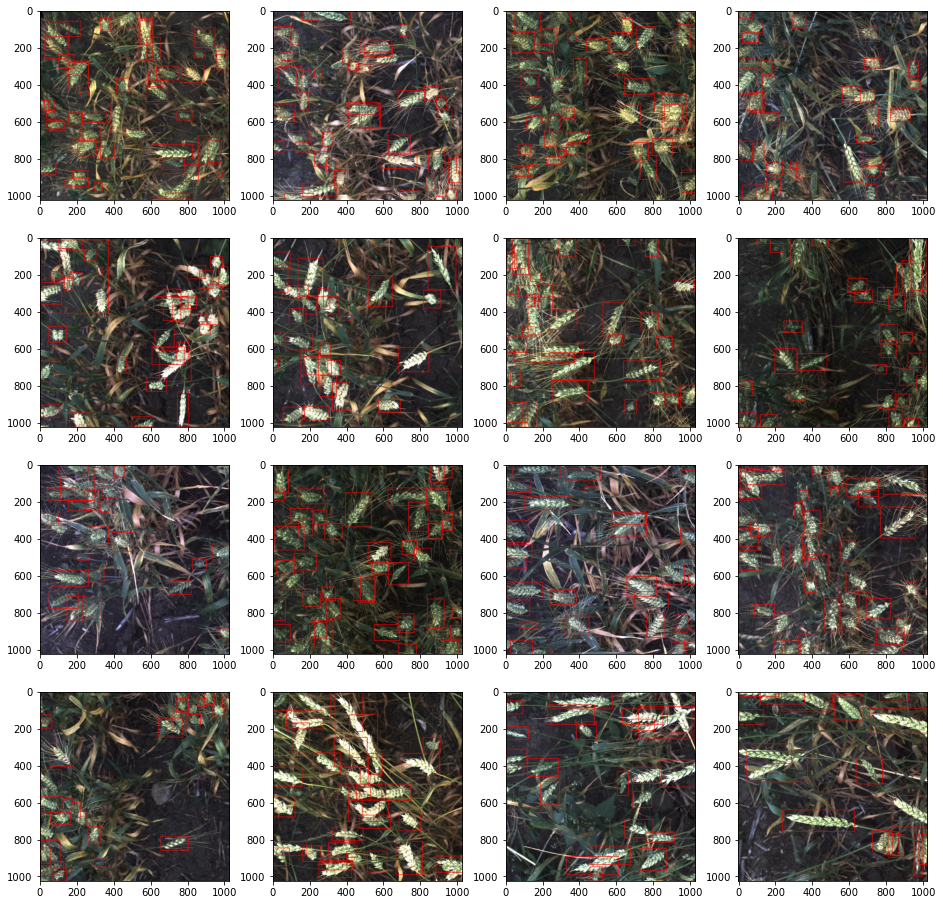

In [23]:
display_samples(df_comb, 4)

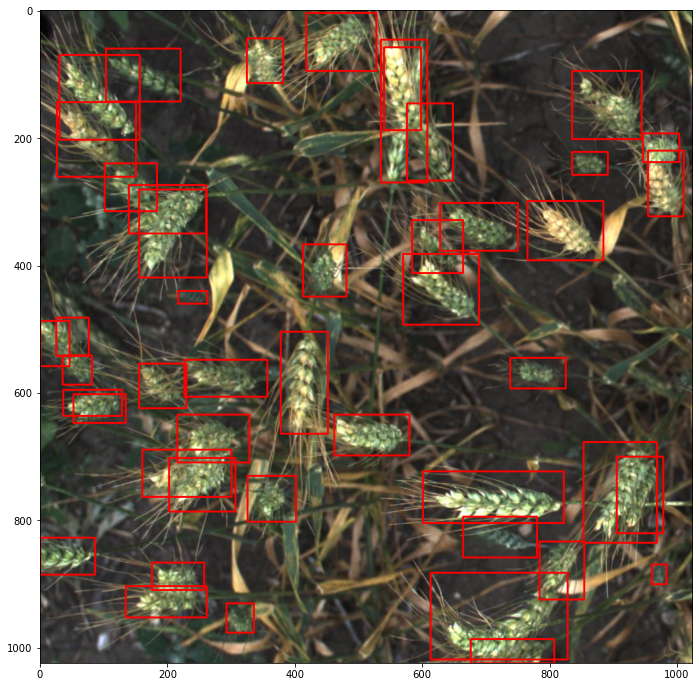

In [24]:
display_samples(df_comb, 1)

In [25]:
from fastai.vision.all import *

In [26]:
images = get_image_files(os.path.join(base_path, 'train'))

In [27]:
len(images)

3422

In [28]:
len(images) == df_comb['image_id'].nunique()

False

In [29]:
# Total uniquie images in the csv
df_comb['image_id'].nunique()

3373

In [30]:
#Unlabelled images
n_unlable_imgs = len(images) - df_comb['image_id'].nunique()
n_unlable_imgs

49

In [31]:
df_comb['label'] = "wheat_head"

In [32]:
df_comb.head()

image_id  \
0  b6ab77fd7   
1  b53afdf5c   
2  7b72ea0fb   
3  91c9d9c38   
4  41c0123cc   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    bboxes  \
0  [[834.0, 222.0, 56.0, 36.0], [226.0, 548.0, 130.0, 58.0], [377.0, 504.0, 74.0, 160.0], [834.0, 95.0, 109.0, 107.0], [26.0, 144.0, 124.0, 117.0], [569.0, 382.0, 119.0, 111.0], [52.0, 602.0, 82.0, 45.0], [627.0, 302.0, 122.0, 75.0], [412.0, 367.0, 68.0, 82.0], [953.0, 220.0, 56.0, 103.0], [30.0, 70.0, 126.0, 133.0], [35.0, 541.0, 46.0, 46.0], [103.0, 60.0, 117.0, 83.0], [417.0, 4.0, 110.0, 91.0], [764.0, 299.0, 119.0, 93.0], [539.0, 58.0, 58.0, 130.0], [139.0, 274.0, 121.0, 76.0], [461.0, 634.0, 118.0, 64.0], [215.0, 634.0, 113.0, 75.0], [134.0, 903.0, 127.0, 49.0], [737.0, 545.0, 87.0, 48.0...   
1  [[988.0, 781.0, 36.0, 96.0], [331.0, 863.0, 70.0, 95.0], [47.0, 226.0, 65.0, 46.0], [682.0, 974.0, 108.0, 50.0], [63.0, 988.0, 156.0, 36.0], [824.0, 901.0, 49.0, 77.0], [815.0, 413.0, 90.0, 72.0], [468.0, 161.0, 172.0, 66.0], [888.0, 537.0, 76.0, 74.0], [3.0, 88.0, 106.0, 69.0], [266.0, 657.0, 57.0, 76.0], [582.0, 771.0, 194.0, 83.0], [77.0, 653.0, 118.0, 76.0], [673.0, 433.0, 148.0, 92.0], [620.0, 673.0, 119.0, 107.0], [224.0, 760.0, 90.0, 82.0], [160.0, 933.0, 179.0, 70.0], [961.0, 784.0, 53.0, 161.0], [392.0, 497.0, 178.0, 67.0], [0.0, 536.0, 116.0, 75.0], [838.0, 761.0, 88.0, 110.0], [...   
2  [[332.0, 662.0, 113.0, 50.0], [285.0, 755.0, 31.0, 34.0], [126.0, 464.0, 65.0, 53.0], [363.0, 262.0, 68.0, 145.0], [912.0, 656.0, 97.0, 76.0], [182.0, 97.0, 92.0, 84.0], [208.0, 652.0, 68.0, 84.0], [109.0, 575.0, 82.0, 70.0], [30.0, 121.0, 125.0, 109.0], [245.0, 371.0, 63.0, 80.0], [911.0, 104.0, 81.0, 98.0], [47.0, 0.0, 140.0, 115.0], [704.0, 89.0, 100.0, 123.0], [674.0, 714.0, 94.0, 94.0], [946.0, 862.0, 78.0, 120.0], [788.0, 693.0, 110.0, 90.0], [623.0, 46.0, 57.0, 84.0], [559.0, 121.0, 116.0, 110.0], [121.0, 834.0, 58.0, 48.0], [637.0, 370.0, 156.0, 86.0], [80.0, 343.0, 97.0, 76.0], [2...   
3  [[124.0, 273.0, 59.0, 73.0], [688.0, 939.0, 61.0, 85.0], [639.0, 674.0, 83.0, 41.0], [562.0, 410.0, 96.0, 83.0], [665.0, 92.0, 96.0, 78.0], [0.0, 317.0, 103.0, 138.0], [681.0, 260.0, 90.0, 57.0], [621.0, 430.0, 117.0, 71.0], [291.0, 28.0, 75.0, 69.0], [687.0, 523.0, 69.0, 100.0], [822.0, 532.0, 109.0, 69.0], [0.0, 178.0, 93.0, 81.0], [41.0, 428.0, 92.0, 112.0], [61.0, 443.0, 79.0, 109.0], [181.0, 620.0, 85.0, 56.0], [0.0, 706.0, 84.0, 103.0], [77.0, 717.0, 63.0, 98.0], [314.0, 828.0, 49.0, 82.0], [154.0, 905.0, 74.0, 85.0], [25.0, 943.0, 110.0, 81.0], [96.0, 954.0, 90.0, 70.0], [686.0, 836...   
4  [[0.0, 669.0, 73.0, 111.0], [572.0, 757.0, 110.0, 74.0], [47.0, 481.0, 94.0, 86.0], [106.0, 60.0, 74.0, 162.0], [0.0, 245.0, 116.0, 117.0], [158.0, 943.0, 110.0, 81.0], [0.0, 15.0, 368.0, 395.0], [101.0, 0.0, 126.0, 75.0], [858.0, 182.0, 75.0, 96.0], [904.0, 257.0, 77.0, 71.0], [612.0, 321.0, 185.0, 68.0], [4.0, 904.0, 99.0, 67.0], [715.0, 366.0, 98.0, 91.0], [603.0, 591.0, 174.0, 97.0], [664.0, 280.0, 95.0, 169.0], [860.0, 456.0, 57.0, 72.0], [642.0, 613.0, 172.0, 164.0], [737.0, 567.0, 65.0, 95.0], [740.0, 834.0, 61.0, 185.0], [619.0, 498.0, 104.0, 99.0], [964.0, 160.0, 46.0, 105.0], [91...   

                    image_path       label  
0  ../data/train/b6ab77fd7.jpg  wheat_head  
1  ../data/train/b53afdf5c.jpg  wheat_head  
2  ../data/train/7b72ea0fb.jpg  wheat_head  
3  ../data/train/91c9d9c38.jpg  wheat_head  
4  ../data/train/41c0123cc.jpg  wheat_head

#### Processing data so as to make it compatible with Datablock API

__Will be creating a numpy array as operations on numpy array are computationally fast__

In [33]:
def apply_np_trans(x):
    tmp = len(x['bboxes'])
    tmp2 = np.array(["wheat_head"] * tmp)
    x['label'] = tmp2
    return x

def prepare_data(df):
    temp_df = df.copy()
    temp_df = temp_df.apply(apply_np_trans, axis=1)
    temp_df.drop("image_path", axis=1, inplace=True)
    return temp_df

def process_bbox(x):
    final = []
    for bbox in x:
        bbox[2] = bbox[0] + bbox[2]
        bbox[3] = bbox[1] + bbox[3]
        final.append([bbox[0], bbox[1], bbox[2], bbox[3]])
    return np.array(final)

In [34]:
df_new = prepare_data(df_comb)
df_new['bboxes'] = df_new['bboxes'].apply(lambda x: process_bbox(x))
df_new.head()

image_id  \
0  b6ab77fd7   
1  b53afdf5c   
2  7b72ea0fb   
3  91c9d9c38   
4  41c0123cc   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    bboxes  \
0  [[834.0, 222.0, 890.0, 258.0], [226.0, 548.0, 356.0, 606.0], [377.0, 504.0, 451.0, 664.0], [834.0, 95.0, 943.0, 202.0], [26.0, 144.0, 150.0, 261.0], [569.0, 382.0, 688.0, 493.0], [52.0, 602.0, 134.0, 647.0], [627.0, 302.0, 749.0, 377.0], [412.0, 367.0, 480.0, 449.0], [953.0, 220.0, 1009.0, 323.0], [30.0, 70.0, 156.0, 203.0], [35.0, 541.0, 81.0, 587.0], [103.0, 60.0, 220.0, 143.0], [417.0, 4.0, 527.0, 95.0], [764.0, 299.0, 883.0, 392.0], [539.0, 58.0, 597.0, 188.0], [139.0, 274.0, 260.0, 350.0], [461.0, 634.0, 579.0, 698.0], [215.0, 634.0, 328.0, 709.0], [134.0, 903.0, 261.0, 952.0], [737.0...   
1  [[988.0, 781.0, 1024.0, 877.0], [331.0, 863.0, 401.0, 958.0], [47.0, 226.0, 112.0, 272.0], [682.0, 974.0, 790.0, 1024.0], [63.0, 988.0, 219.0, 1024.0], [824.0, 901.0, 873.0, 978.0], [815.0, 413.0, 905.0, 485.0], [468.0, 161.0, 640.0, 227.0], [888.0, 537.0, 964.0, 611.0], [3.0, 88.0, 109.0, 157.0], [266.0, 657.0, 323.0, 733.0], [582.0, 771.0, 776.0, 854.0], [77.0, 653.0, 195.0, 729.0], [673.0, 433.0, 821.0, 525.0], [620.0, 673.0, 739.0, 780.0], [224.0, 760.0, 314.0, 842.0], [160.0, 933.0, 339.0, 1003.0], [961.0, 784.0, 1014.0, 945.0], [392.0, 497.0, 570.0, 564.0], [0.0, 536.0, 116.0, 611.0]...   
2  [[332.0, 662.0, 445.0, 712.0], [285.0, 755.0, 316.0, 789.0], [126.0, 464.0, 191.0, 517.0], [363.0, 262.0, 431.0, 407.0], [912.0, 656.0, 1009.0, 732.0], [182.0, 97.0, 274.0, 181.0], [208.0, 652.0, 276.0, 736.0], [109.0, 575.0, 191.0, 645.0], [30.0, 121.0, 155.0, 230.0], [245.0, 371.0, 308.0, 451.0], [911.0, 104.0, 992.0, 202.0], [47.0, 0.0, 187.0, 115.0], [704.0, 89.0, 804.0, 212.0], [674.0, 714.0, 768.0, 808.0], [946.0, 862.0, 1024.0, 982.0], [788.0, 693.0, 898.0, 783.0], [623.0, 46.0, 680.0, 130.0], [559.0, 121.0, 675.0, 231.0], [121.0, 834.0, 179.0, 882.0], [637.0, 370.0, 793.0, 456.0], ...   
3  [[124.0, 273.0, 183.0, 346.0], [688.0, 939.0, 749.0, 1024.0], [639.0, 674.0, 722.0, 715.0], [562.0, 410.0, 658.0, 493.0], [665.0, 92.0, 761.0, 170.0], [0.0, 317.0, 103.0, 455.0], [681.0, 260.0, 771.0, 317.0], [621.0, 430.0, 738.0, 501.0], [291.0, 28.0, 366.0, 97.0], [687.0, 523.0, 756.0, 623.0], [822.0, 532.0, 931.0, 601.0], [0.0, 178.0, 93.0, 259.0], [41.0, 428.0, 133.0, 540.0], [61.0, 443.0, 140.0, 552.0], [181.0, 620.0, 266.0, 676.0], [0.0, 706.0, 84.0, 809.0], [77.0, 717.0, 140.0, 815.0], [314.0, 828.0, 363.0, 910.0], [154.0, 905.0, 228.0, 990.0], [25.0, 943.0, 135.0, 1024.0], [96.0, 9...   
4  [[0.0, 669.0, 73.0, 780.0], [572.0, 757.0, 682.0, 831.0], [47.0, 481.0, 141.0, 567.0], [106.0, 60.0, 180.0, 222.0], [0.0, 245.0, 116.0, 362.0], [158.0, 943.0, 268.0, 1024.0], [0.0, 15.0, 368.0, 410.0], [101.0, 0.0, 227.0, 75.0], [858.0, 182.0, 933.0, 278.0], [904.0, 257.0, 981.0, 328.0], [612.0, 321.0, 797.0, 389.0], [4.0, 904.0, 103.0, 971.0], [715.0, 366.0, 813.0, 457.0], [603.0, 591.0, 777.0, 688.0], [664.0, 280.0, 759.0, 449.0], [860.0, 456.0, 917.0, 528.0], [642.0, 613.0, 814.0, 777.0], [737.0, 567.0, 802.0, 662.0], [740.0, 834.0, 801.0, 1019.0], [619.0, 498.0, 723.0, 597.0], [964.0, ...   

                                                                                                                                                                                                                                                                              

In [35]:
df_new_np = df_new.to_numpy()

In [36]:
np.save(os.path.join(base_path, 'data.npy'), df_new_np)

In [37]:
def get_items(noop):
    return [Path(x) for x in df_comb['image_path'].values]

def get_bbox(x):
    "Gets bounding box from path"
    idx = np.where((df_new_np[:,0] == x.stem))
    return df_new_np[idx][0][1]

def get_label(x):
    "Get's label from `fn`"
    idx = np.where((df_new_np[:,0] == x.stem))
    return df_new_np[idx][0][2]

In [38]:
a = get_items(None)[0]

In [39]:
%%timeit
_ = get_bbox(a)

46.5 µs ± 732 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
%%timeit
_ = get_label(a)

46.6 µs ± 954 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [41]:
wheat_dl = DataBlock(blocks=[ImageBlock, BBoxBlock, BBoxLblBlock],
                    get_items=get_items,
                    splitter=RandomSplitter(seed=17),
                    get_y=[get_bbox, get_label],
                    item_tfms=Resize(256, method=ResizeMethod.Pad),
                    batch_tfms= aug_transforms(mult=2),
                    n_inp=1)

In [42]:
path = Path(base_path)
dls = wheat_dl.dataloaders(path, bs=32, num_workers=4)

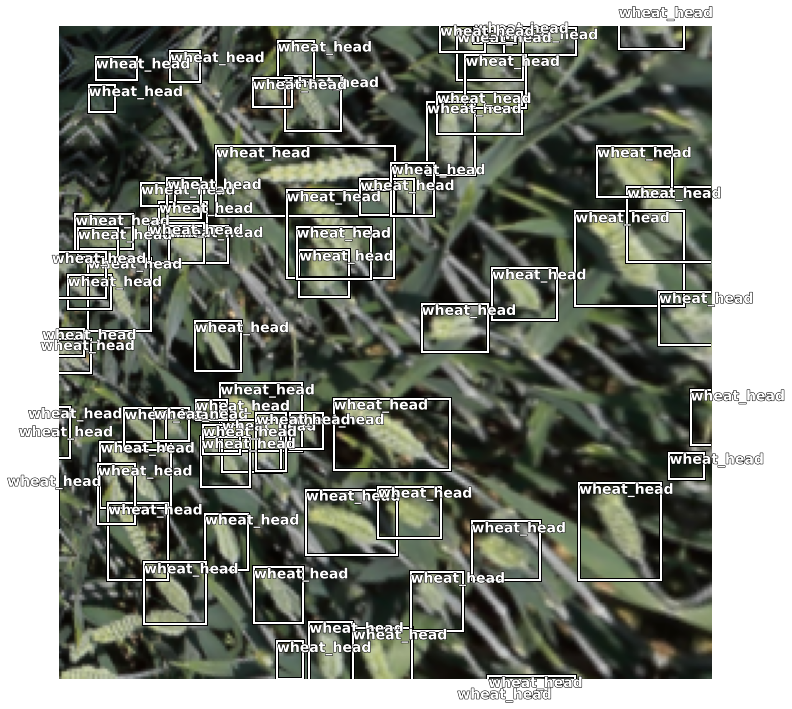

In [43]:
dls.show_batch(max_n=1, figsize=(12,12))